A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? (PENDIENTE)

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo): (HACED PREDICION CON ESTAS 5 COLUMNAS)

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np 
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [22]:
df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [ ]:
to_string_percentage = lambda x: str(str(x)+ "%")
df[i].apply(to_string_percentage)
df[i].str[0:4].astype(float)

In [3]:
dt = df.loc[:,"Goals":]
dt

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
1,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
3,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
4,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
6,5,8,18,30.7%,19.2%,32,1,1,1,0,...,13,65.1%,67,48,12,9,1,12,12,20
7,6,34,45,43.0%,7.5%,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
8,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,2,15,23,39.4%,5.2%,48,0,0,0,1,...,6,66.7%,48,56,3,7,1,7,7,17


In [4]:
for i in dt.columns:
    if dt[i].dtype == "object":
        dt[i] = dt[i].replace('%',' ',regex=True).astype(float)
dt

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,4,13,12,51.9,16.0,32,0,0,0,2,...,13,81.3,41,62,2,9,0,9,9,16
1,4,13,18,41.9,12.9,39,0,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,4,10,10,50.0,20.0,27,1,0,0,3,...,10,66.7,25,38,8,4,0,7,7,15
3,5,11,18,50.0,17.2,40,0,0,0,3,...,22,88.1,43,45,6,5,0,11,11,16
4,3,22,24,37.9,6.5,65,1,0,0,0,...,6,54.6,36,51,5,6,0,11,11,19
5,10,32,32,47.8,15.6,80,2,1,0,2,...,10,62.6,63,49,12,4,0,15,15,17
6,5,8,18,30.7,19.2,32,1,1,1,0,...,13,65.1,67,48,12,9,1,12,12,20
7,6,34,45,43.0,7.5,110,2,0,0,2,...,20,74.1,101,89,16,16,0,18,18,19
8,2,12,36,25.0,4.1,60,2,0,0,0,...,12,70.6,35,30,3,5,0,7,7,15
9,2,15,23,39.4,5.2,48,0,0,0,1,...,6,66.7,48,56,3,7,1,7,7,17


In [5]:
dt["Team"] = df["Team"]
dt

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,Team
0,4,13,12,51.9,16.0,32,0,0,0,2,...,81.3,41,62,2,9,0,9,9,16,Croatia
1,4,13,18,41.9,12.9,39,0,0,0,0,...,60.1,53,73,8,7,0,11,11,19,Czech Republic
2,4,10,10,50.0,20.0,27,1,0,0,3,...,66.7,25,38,8,4,0,7,7,15,Denmark
3,5,11,18,50.0,17.2,40,0,0,0,3,...,88.1,43,45,6,5,0,11,11,16,England
4,3,22,24,37.9,6.5,65,1,0,0,0,...,54.6,36,51,5,6,0,11,11,19,France
5,10,32,32,47.8,15.6,80,2,1,0,2,...,62.6,63,49,12,4,0,15,15,17,Germany
6,5,8,18,30.7,19.2,32,1,1,1,0,...,65.1,67,48,12,9,1,12,12,20,Greece
7,6,34,45,43.0,7.5,110,2,0,0,2,...,74.1,101,89,16,16,0,18,18,19,Italy
8,2,12,36,25.0,4.1,60,2,0,0,0,...,70.6,35,30,3,5,0,7,7,15,Netherlands
9,2,15,23,39.4,5.2,48,0,0,0,1,...,66.7,48,56,3,7,1,7,7,17,Poland


In [227]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Goals                       16 non-null     int64  
 1   Shots on target             16 non-null     int64  
 2   Shots off target            16 non-null     int64  
 3   Shooting Accuracy           16 non-null     float64
 4   % Goals-to-shots            16 non-null     float64
 5   Total shots (inc. Blocked)  16 non-null     int64  
 6   Hit Woodwork                16 non-null     int64  
 7   Penalty goals               16 non-null     int64  
 8   Penalties not scored        16 non-null     int64  
 9   Headed goals                16 non-null     int64  
 10  Passes                      16 non-null     int64  
 11  Passes completed            16 non-null     int64  
 12  Passing Accuracy            16 non-null     float64
 13  Touches                     16 non-nu

In [228]:
df.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


<AxesSubplot:>

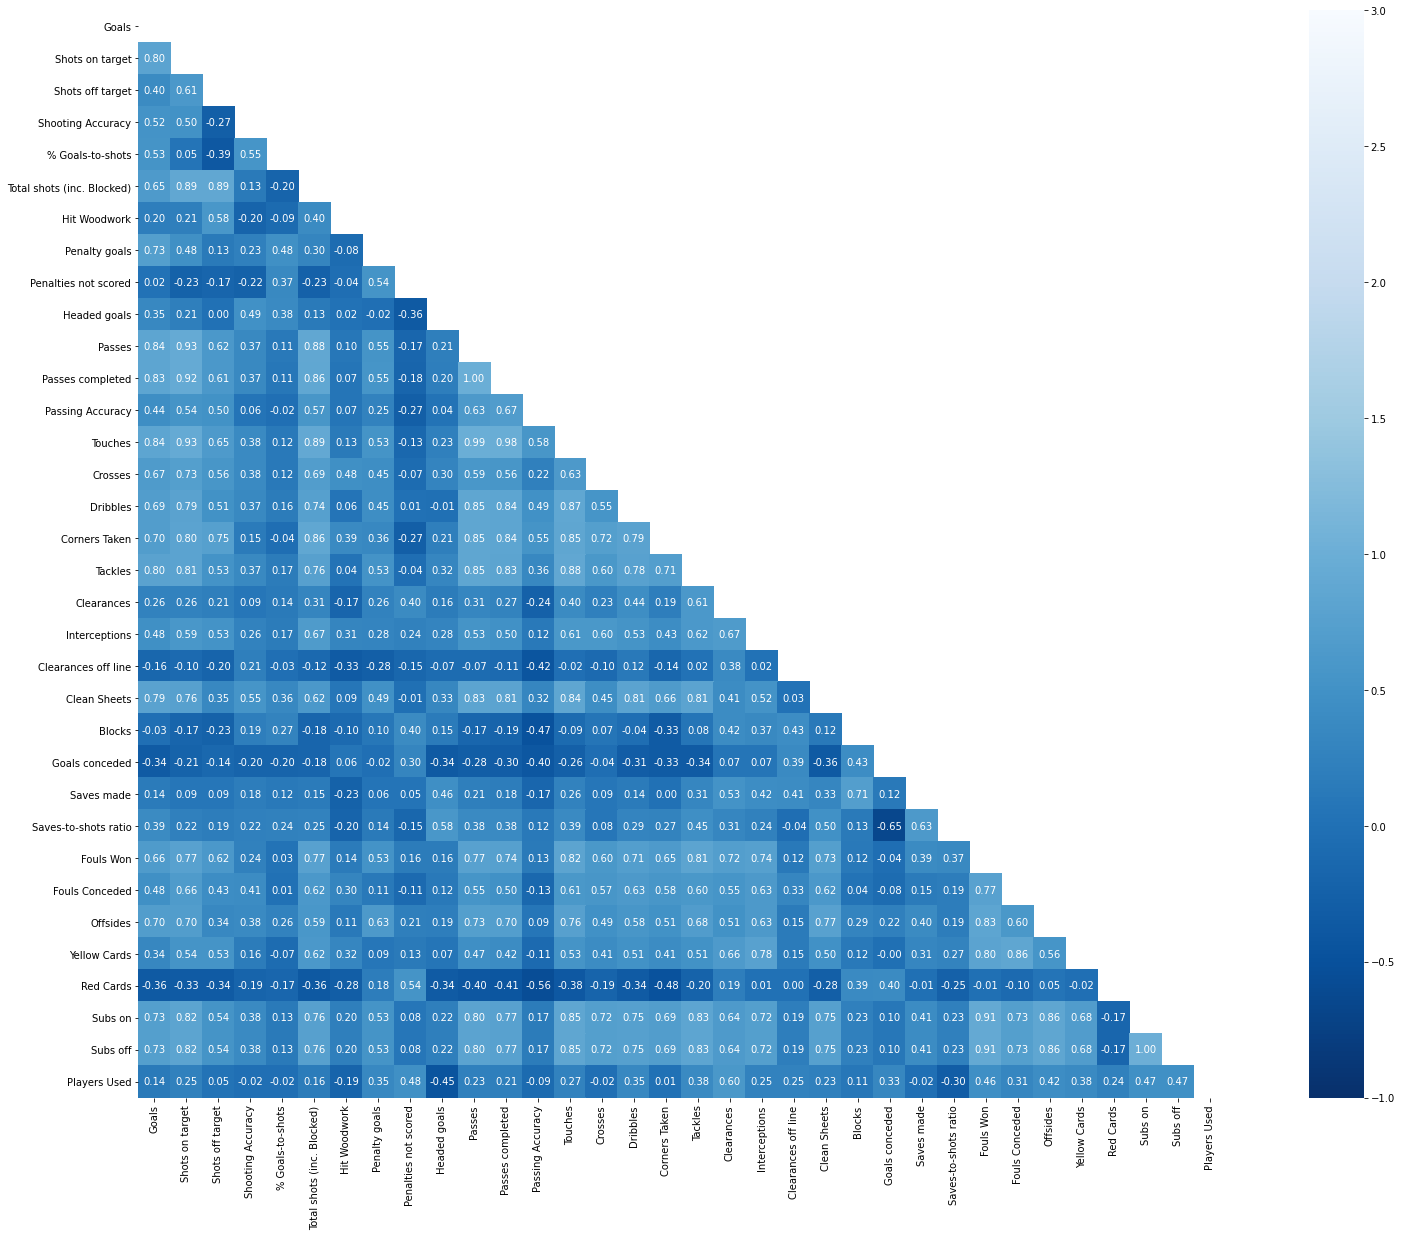

In [240]:
import numpy as np 
import matplotlib.pyplot as plt
matrix = np.triu(dt.corr())
fig = plt.figure(figsize=(30,20))
plt.subplot(111)
sns.heatmap(dt.corr(),  annot=True, fmt='.2f', square=True, cmap='Blues_r', mask= matrix, vmin=-1, vmax=3)

¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? (PENDIENTE)

In [6]:
dt2= dt[["Goals", "Shooting Accuracy"]]
dt2

,Goals,Shooting Accuracy
0,4,51.9
1,4,41.9
2,4,50.0
3,5,50.0
4,3,37.9
5,10,47.8
6,5,30.7
7,6,43.0
8,2,25.0
9,2,39.4


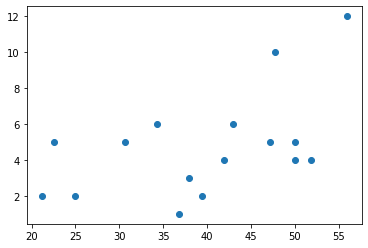

In [271]:
plt.scatter(dt2["Shooting Accuracy"], dt2.Goals)

In [7]:
X= dt2[["Shooting Accuracy"]]
X.shape

(16, 1)

In [8]:
y= dt2["Goals"]
y.shape

(16,)

In [9]:
#Regresión lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr.score(X_train, y_train)

0.32491912270699896

In [16]:
predictions = lr.predict(X_test)
print("Score test:", lr.score(X_test, y_test))

Score test: -1.4926274428510902


In [12]:
#y = a + bX
b = lr.coef_
print("Pendiente:", b)
a = lr.intercept_
print("Secante:", a)

Pendiente: [0.15401973]
Secante: -1.0453686047595543


In [13]:
y = a + (b*X)
y

,Shooting Accuracy
0,6.948256
1,5.408058
2,6.655618
3,6.655618
4,4.791979
5,6.316775
6,3.683037
7,5.577480
8,2.805125
9,5.023009


In [290]:
#Tarda mucho en ejecutar
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel':('linear', 'rbf', 'poly'), 
    'C':[0.0001,0.1, 0.5, 1, 5, 10, 100], 
    'degree': [1,2,3,4,5,6,7,8,9],
    'coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'gamma': ('scale', 'auto')
    }

svr = SVR()

clf = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

print("clf.best_stimator_", clf.best_estimator_)
print("clf.best_params_", clf.best_params_)
print("clf.best_score", clf.best_score_)

In [17]:
#Regresión no linear de manera individual
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(X_train, y_train)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [19]:
#Porque da negativo?
svr_poly.score(X_train, y_train)*100


-2928473785.584749

In [1]:
-2928473785.584749/100

-29284737.855847493

In [22]:
from sklearn.metrics import r2_score
y_pred= svr_poly.predict(X_test)
print("Score:", r2_score(X_test, y_pred))

Score: -5573174.363442705


In [23]:
#SVR kernel linear
svr_linear = SVR(kernel='linear', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_linear.fit(X_train, y_train)
svr_linear.score(X_train, y_train)

0.19555346735433987

In [27]:
y_pred= svr_linear.predict(X_test)
svr_linear.score(X_test,y_test)
r2_score(X_test, y_pred)

-26.16833735151621

In [28]:
#SVR- kernel rbf el mejor score en el modelo de entrenamiento
svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_train, y_train)

0.9989359334404004

In [30]:
y_pred= svr_rbf.predict(X_test)
print("Score", svr_rbf.score(X_test,y_test))
print("R2_score", r2_score(X_test, y_pred))

Score -0.5107706648569643
R2_score -25.899384507773824


In [31]:
#Non linear polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 3
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

print(X_poly)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("Score:", r2_score(y_train, y_pred))

[[1.00000000e+00 4.30000000e+01 1.84900000e+03 7.95070000e+04]
 [1.00000000e+00 5.59000000e+01 3.12481000e+03 1.74676879e+05]
 [1.00000000e+00 4.19000000e+01 1.75561000e+03 7.35600590e+04]
 [1.00000000e+00 2.50000000e+01 6.25000000e+02 1.56250000e+04]
 [1.00000000e+00 4.72000000e+01 2.22784000e+03 1.05154048e+05]
 [1.00000000e+00 3.43000000e+01 1.17649000e+03 4.03536070e+04]
 [1.00000000e+00 5.00000000e+01 2.50000000e+03 1.25000000e+05]
 [1.00000000e+00 5.19000000e+01 2.69361000e+03 1.39798359e+05]
 [1.00000000e+00 2.12000000e+01 4.49440000e+02 9.52812800e+03]
 [1.00000000e+00 4.78000000e+01 2.28484000e+03 1.09215352e+05]
 [1.00000000e+00 2.25000000e+01 5.06250000e+02 1.13906250e+04]
 [1.00000000e+00 3.68000000e+01 1.35424000e+03 4.98360320e+04]]
Score: 0.4445427456184494


3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo): (HACED PREDICION CON ESTAS 5 COLUMNAS)

% de goles por disparo: 40%

Total shots (inc. Blocked): 102

Corners Taken: 5

Passes: 82

Dribbles: 23

In [32]:
dt3 = dt[["% Goals-to-shots","Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]]

In [76]:
X = dt3
X.shape

(16, 5)

In [77]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
model = LogisticRegression()
le = preprocessing.LabelEncoder()
y = le.fit_transform(dt["Goals"])
y.shape

(16,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [39]:
model.predict(X_test)

array([6, 0, 4, 2], dtype=int64)

In [44]:
X_test.shape

(4, 5)

In [49]:
new_pred = np.array([40,102,5,82,23])
new_pred= new_pred.reshape(1,-1)

In [51]:
#Precide 5 goles con este modeloy las caracteristicas dadas
y_pred= model.predict(new_pred)
y_pred

array([5], dtype=int64)

In [79]:
#SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
parameters = {
    'kernel':('linear', 'rbf', 'sigmoid'), 
    'C':[0.0001,0.1, 0.5, 1, 5, 10, 100], 
    'degree': [1,2,3,4,5,6,7,8,9],
    'coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'gamma': ('scale', 'auto')
    }

svc = SVC()

clf = GridSearchCV(estimator=svc, param_grid=parameters, n_jobs=-1)
clf.fit(X_train, y_train)

print("clf.best_stimator_", clf.best_estimator_)
print("clf.best_params_", clf.best_params_)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [57]:
#SVC- kernel rbf
svc_rbf= SVC(kernel= "rbf", C=10, degree= 4, coef0=1)
svc_rbf.fit(X_train, y_train)
svc_rbf.score(X_train,y_train)

0.5

In [58]:
svc_rbf.predict(X_test)

array([4, 6, 4, 4], dtype=int64)

In [59]:
#Para este modelo predice 0 goles. 
svc_rbf.predict(new_pred)

array([0], dtype=int64)

In [61]:
#SVC linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
svc_linear= SVC(kernel= "rbf", C=10, degree= 4, coef0=1)
svc_linear.fit(X_train, y_train)
svc_linear.score(X_train,y_train)

0.4166666666666667

In [62]:
svc_linear.predict(X_test)

array([4, 4, 4, 5], dtype=int64)

In [63]:
#Para este modelo predice 0 goles. 
svc_linear.predict(new_pred)

array([0], dtype=int64)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
svc_sigmoid= SVC(kernel= "sigmoid", C=10, degree= 4, coef0=1)
svc_sigmoid.fit(X_train, y_train)
svc_sigmoid.score(X_train,y_train)

0.3333333333333333

In [65]:
svc_sigmoid.predict(X_test)

array([4, 4, 4, 4], dtype=int64)

In [66]:
#Para este modelo predice 4 goles
svc_sigmoid.predict(new_pred)

array([4], dtype=int64)

In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

1.0

In [69]:
rfc.predict(X_test)

array([6, 3, 3, 3], dtype=int64)

In [70]:
#Para este modelo predice 1 gol
rfc.predict(new_pred)

array([1], dtype=int64)

# Pruebas

In [131]:
len(df["Team"].iloc[2])

7

In [145]:
dt["% Goals-to-shots"].iloc[5]= dt["% Goals-to-shots"].iloc[5][0:3]

In [158]:
m= 0
for i in dt.columns:
    while m <=16:
        if dt[i].dtype == "object":
            if len(dt[i].iloc[m]) <= 4:
                dt[i]= dt[i].str[0:3].astype(float)
            else:
                dt[i]= dt[i].str[0:4].astype(float)  
        break
    m+=1
dt

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,4,13,12,51.9,16.0,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
1,4,13,18,41.9,12.0,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,4,10,10,50.0,20.0,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
3,5,11,18,50.0,17.0,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
4,3,22,24,37.9,6.5,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,10,32,32,47.8,15.0,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
6,5,8,18,30.7,19.0,32,1,1,1,0,...,13,65.1%,67,48,12,9,1,12,12,20
7,6,34,45,43.0,7.5,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
8,2,12,36,25.0,4.1,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,2,15,23,39.4,5.2,48,0,0,0,1,...,6,66.7%,48,56,3,7,1,7,7,17


In [ ]:
m= 0
for i in dt.columns:
    while m <=16:
        if dt[i].dtype == "object":
            if len(dt[i].iloc[m]) <= 4:
                dt[i].iloc[m]= dt[i].iloc[m][0:3]
            else:
                dt[i].iloc[m]= dt[i].iloc[m][0:4]  
        break
    m+=1
dt

In [181]:

dt.fillna(value={'Goals' : 789} , limit=1)

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,4,13,12,51.9,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
1,4,13,18,41.9,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,4,10,10,50.0,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
3,5,11,18,50.0,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
4,3,22,24,37.9,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,10,32,32,47.8,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
6,5,8,18,30.7,19.2%,32,1,1,1,0,...,13,65.1%,67,48,12,9,1,12,12,20
7,6,34,45,43.0,7.5%,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
8,2,12,36,25.0,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,2,15,23,39.4,5.2%,48,0,0,0,1,...,6,66.7%,48,56,3,7,1,7,7,17


In [177]:
m= 0
for i in dt.columns:
    while dt[i].dtype == "object":
        for val in dt[i]:
            if len(val) <= 4:
                dt[i].iloc[m]= dt[i].iloc[m][0:3]
            else:
                dt[i].iloc[m]= dt[i].iloc[m][0:4]  
            m+=1
        yield m
        else:
            next(m)"""



22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0
37.9
47.8
30.7
43.0
25.0
39.4
34.3
36.8
22.5
55.9
47.2
21.2
51.9
41.9
50.0
50.0

KeyboardInterrupt: 

<AxesSubplot:>

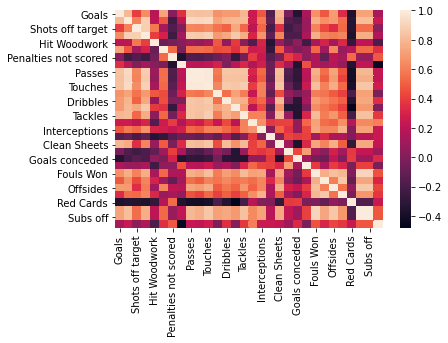

In [4]:
df.isna().sum()

Team                          0
Goals                         0
Shots on target               0
Shots off target              0
Shooting Accuracy             0
% Goals-to-shots              0
Total shots (inc. Blocked)    0
Hit Woodwork                  0
Penalty goals                 0
Penalties not scored          0
Headed goals                  0
Passes                        0
Passes completed              0
Passing Accuracy              0
Touches                       0
Crosses                       0
Dribbles                      0
Corners Taken                 0
Tackles                       0
Clearances                    0
Interceptions                 0
Clearances off line           1
Clean Sheets                  0
Blocks                        0
Goals conceded                0
Saves made                    0
Saves-to-shots ratio          0
Fouls Won                     0
Fouls Conceded                0
Offsides                      0
Yellow Cards                  0
Red Card

In [6]:
df["Saves-to-shots ratio"].value_counts()

66.7%    2
70.6%    1
65.4%    1
71.5%    1
88.1%    1
61.6%    1
62.6%    1
74.1%    1
77.0%    1
65.1%    1
93.8%    1
81.3%    1
54.6%    1
60.1%    1
76.5%    1
Name: Saves-to-shots ratio, dtype: int64